## Writing functions to forecast food prices in Rwanda
<p>Every time I go to the supermarket, my wallet weeps a little. But how expensive is food around the world? In this notebook, we'll explore time series of food prices in Rwanda from the <a href="https://data.humdata.org/dataset/wfp-food-prices">United Nations Humanitarian Data Exchange Global Food Price Database</a>. Agriculture makes up over 30% of Rwanda's economy, and over 60% of its export earnings (<a href="https://www.cia.gov/library/publications/the-world-factbook/geos/rw.html">CIA World Factbook</a>), so the price of food is very important to the livelihood of many Rwandans.</p>
<p>The map below shows the layout of Rwanda; it is split into five administrative regions. The central area around the Capital city, Kigali, is one region, and the others are North, East, South, and West.</p>
<p><img src="https://assets.datacamp.com/production/project_1008/img/RwandaGeoProvinces.png" alt="A map of the five administrative regions of Rwanda"></p>
<p>In this notebook, we're going to import, manipulate and forecast Rwandan sorghum price data. We'll also wrap our analysis into functions to make it easy to analyze prices of other foods.</p>
<p>The sorghum data is stored in the file <code>datasets/Sorghum.csv</code>. Each row contains the price of sorghum at one market on one day. It contains 18 columns.</p>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th style="text-align:left;">meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>adm0_id</code></td>
<td><code>int</code></td>
<td style="text-align:left;">Country code. Always 215.</td>
</tr>
<tr>
<td style="text-align:left;"><code>adm0_name</code></td>
<td><code>chr</code></td>
<td style="text-align:left;">Country name. Always "Rwanda".</td>
</tr>
<tr>
<td style="text-align:left;"><code>adm1_id</code></td>
<td><code>int</code></td>
<td style="text-align:left;">Region code.</td>
</tr>
<tr>
<td style="text-align:left;"><code>adm1_name</code></td>
<td><code>chr</code></td>
<td style="text-align:left;">Region name.</td>
</tr>
<tr>
<td style="text-align:left;"><code>mkt_id</code></td>
<td><code>int</code></td>
<td style="text-align:left;">Market code.</td>
</tr>
<tr>
<td style="text-align:left;"><code>mkt_name</code></td>
<td><code>chr</code></td>
<td style="text-align:left;">Market name.</td>
</tr>
<tr>
<td style="text-align:left;"><code>cm_id</code></td>
<td><code>int</code></td>
<td style="text-align:left;">Commodity code.</td>
</tr>
<tr>
<td style="text-align:left;"><code>cm_name</code></td>
<td><code>chr</code></td>
<td style="text-align:left;">Commodity name.</td>
</tr>
<tr>
<td style="text-align:left;"><code>cur_id</code></td>
<td><code>int</code></td>
<td style="text-align:left;">Currency code. Always 77.</td>
</tr>
<tr>
<td style="text-align:left;"><code>cur_name</code></td>
<td><code>chr</code></td>
<td style="text-align:left;">Currency name. Always "RWF".</td>
</tr>
<tr>
<td style="text-align:left;"><code>pt_id</code></td>
<td><code>int</code></td>
<td style="text-align:left;">Price type code. Always 15.</td>
</tr>
<tr>
<td style="text-align:left;"><code>pt_name</code></td>
<td><code>chr</code></td>
<td style="text-align:left;">Price type name. Always "Retail".</td>
</tr>
<tr>
<td style="text-align:left;"><code>um_id</code></td>
<td><code>int</code></td>
<td style="text-align:left;">Unit of measurement code.</td>
</tr>
<tr>
<td style="text-align:left;"><code>um_name</code></td>
<td><code>chr</code></td>
<td style="text-align:left;">Unit of measurement name. Always "KG".</td>
</tr>
<tr>
<td style="text-align:left;"><code>mp_month</code></td>
<td><code>int</code></td>
<td style="text-align:left;">Month when price occurred.</td>
</tr>
<tr>
<td style="text-align:left;"><code>mp_year</code></td>
<td><code>int</code></td>
<td style="text-align:left;">Year when price occurred. 2008 to 2015.</td>
</tr>
<tr>
<td style="text-align:left;"><code>mp_price</code></td>
<td><code>dbl</code></td>
<td style="text-align:left;">Price of 1 unit of commodity in currency.</td>
</tr>
<tr>
<td style="text-align:left;"><code>mp_commoditysource</code></td>
<td><code>chr</code></td>
<td style="text-align:left;">Data source. Always "MINAGRI".</td>
</tr>
</tbody>
</table>

## Questions
1. Write a function that imports a commodity CSV file and returns the median price of the commodity in Rwandan Francs (RWF) on each date.

2. Write a function that accepts the median price data and returns the forecasted price for that commodity over the next two years.

In [45]:
library(readr)
library(lubridate)
library(dplyr)
library(ggplot2)
library(forecast)
library(magrittr)
library(tibble)

### 1. Write a function that imports a commodity CSV file and returns the median price of the commodity in Rwandan Francs (RWF) on each date.


In [2]:
df = read_csv("datasets/Cassava.csv")
head(df)

Parsed with column specification:
cols(
  adm0_id = col_double(),
  adm0_name = col_character(),
  adm1_id = col_double(),
  adm1_name = col_character(),
  mkt_id = col_double(),
  mkt_name = col_character(),
  cm_id = col_double(),
  cm_name = col_character(),
  cur_id = col_double(),
  cur_name = col_character(),
  pt_id = col_double(),
  pt_name = col_character(),
  um_id = col_double(),
  um_name = col_character(),
  mp_month = col_double(),
  mp_year = col_double(),
  mp_price = col_double(),
  mp_commoditysource = col_character()
)


adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,68,Cassava,77,RWF,15,Retail,5,KG,11,2010,181.5000,MINAGRI
205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,68,Cassava,77,RWF,15,Retail,5,KG,12,2010,182.1667,MINAGRI
205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,68,Cassava,77,RWF,15,Retail,5,KG,1,2011,148.0000,MINAGRI
205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,68,Cassava,77,RWF,15,Retail,5,KG,2,2011,155.0000,MINAGRI
205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,68,Cassava,77,RWF,15,Retail,5,KG,3,2011,178.3333,MINAGRI
205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,68,Cassava,77,RWF,15,Retail,5,KG,4,2011,169.0000,MINAGRI


In [9]:
get_median_price_by_date <- function(data_path){
# this function takes a data path as input for data manipulation
# Input : data path
# Output : return a data frame of median price with each date
    
# we are interested in mp_month, mp_year and mp_price
data <- read_csv(data_path)#, col_types = cols_only(mp_month = col_double(),mp_year = col_double(),mp_price = col_double()))
    
#create a date column before mp_price, calculate median price of each year
data %>% mutate(date = ymd(paste(mp_year, mp_month, "01"))) %>% 
        group_by(date) %>% 
        summarise(median_price_rwf = median(mp_price))
   # return (data)
}

In [10]:
test <- get_median_price_by_date("datasets/Cassava.csv")
head(test, 2)

Parsed with column specification:
cols(
  adm0_id = col_double(),
  adm0_name = col_character(),
  adm1_id = col_double(),
  adm1_name = col_character(),
  mkt_id = col_double(),
  mkt_name = col_character(),
  cm_id = col_double(),
  cm_name = col_character(),
  cur_id = col_double(),
  cur_name = col_character(),
  pt_id = col_double(),
  pt_name = col_character(),
  um_id = col_double(),
  um_name = col_character(),
  mp_month = col_double(),
  mp_year = col_double(),
  mp_price = col_double(),
  mp_commoditysource = col_character()
)


date,median_price_rwf
2008-01-01,132.5
2008-02-01,132.5


### 2. Write a function that accepts the median price data and returns the forecasted price for that commodity over the next two years.

In [5]:
forecast_price <- function(median_price_by_date){
#This function take a dataframe to forcast the next two year based on median price
#input : the dataframe from get_median_price_by_date()
#output: show the forcast 
    
#get the min and max date from df
max_date <- max(median_price_by_date$date)
min_date <- min(median_price_by_date$date)

commodity_ts <- median_price_by_date %$% 
    ts(
          median_price_rwf, 
          start = c(year(min_date), month(min_date)), 
          end = c(year(max_date), month(max_date)), 
          frequency = 12) 
    forecast(commodity_ts)
}

In [6]:
dir("datasets")

[1] "Beans (dry).csv"        "Cassava.csv"            "Chili (red).csv"       
[4] "Maize.csv"              "Oranges (big size).csv" "Peas (fresh).csv"      
[7] "Potatoes (Irish).csv"   "Sorghum.csv"            "Tomatoes.csv"

In [27]:
sorghum_median_price_by_date <- get_median_price_by_date("datasets/Sorghum.csv")
sorghum_forecast_price<-forecast_price(sorghum_median_price_by_date) 
sorghum_forecast_price

Parsed with column specification:
cols(
  adm0_id = col_double(),
  adm0_name = col_character(),
  adm1_id = col_double(),
  adm1_name = col_character(),
  mkt_id = col_double(),
  mkt_name = col_character(),
  cm_id = col_double(),
  cm_name = col_character(),
  cur_id = col_double(),
  cur_name = col_character(),
  pt_id = col_double(),
  pt_name = col_character(),
  um_id = col_double(),
  um_name = col_character(),
  mp_month = col_double(),
  mp_year = col_double(),
  mp_price = col_double(),
  mp_commoditysource = col_character()
)


[1] "list"

## Stretch tasks
1. The forecast for cassava is unusual. How would you interpret it?
2. There are nine datasets in the datasets directory. Try your functions on the other commodities.
3. Try visualizing the time series and the forecasts.
4. Are there differences in prices between different regions in Rwanda for any commodities?
5. What happens if you tweak the settings for forecast()?
6. Can you perform the importing, data manipulation or forecasting tasks with different packages?

1. The forecast for cassava is unusual. How would you interpret it?

In [12]:
cassava_median_price_by_date <- get_median_price_by_date("datasets/Cassava.csv")
forecast_price(cassava_median_price_by_date) 

Parsed with column specification:
cols(
  adm0_id = col_double(),
  adm0_name = col_character(),
  adm1_id = col_double(),
  adm1_name = col_character(),
  mkt_id = col_double(),
  mkt_name = col_character(),
  cm_id = col_double(),
  cm_name = col_character(),
  cur_id = col_double(),
  cur_name = col_character(),
  pt_id = col_double(),
  pt_name = col_character(),
  um_id = col_double(),
  um_name = col_character(),
  mp_month = col_double(),
  mp_year = col_double(),
  mp_price = col_double(),
  mp_commoditysource = col_character()
)


         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
Jan 2016       225.0163 205.2698 244.7627 194.81671 255.2159
Feb 2016       225.0163 197.1518 252.8807 182.40129 267.6313
Mar 2016       225.0163 190.8883 259.1443 172.82200 277.2106
Apr 2016       225.0163 185.5852 264.4474 164.71163 285.3209
May 2016       225.0163 180.8948 269.1378 157.53829 292.4943
Jun 2016       225.0163 176.6385 273.3941 151.02880 299.0038
Jul 2016       225.0163 172.7101 277.3225 145.02081 305.0118
Aug 2016       225.0163 169.0404 280.9922 139.40854 310.6240
Sep 2016       225.0163 165.5815 284.4511 134.11857 315.9140
Oct 2016       225.0163 162.2983 287.7342 129.09746 320.9351
Nov 2016       225.0163 159.1646 290.8679 124.30487 325.7277
Dec 2016       225.0163 156.1599 293.8727 119.70951 330.3231
Jan 2017       225.0163 153.2678 296.7647 115.28651 334.7461
Feb 2017       225.0163 150.4753 299.5573 111.01572 339.0169
Mar 2017       225.0163 147.7715 302.2611 106.88053 343.1520
Apr 2017       225.0163 

The predict price based on median price of cassava for the next two years become a straight line as 225.0163.

In [57]:
median_price_plot <- function(median_price){
    #functions plots the median price vs time
    
    ggplot(median_price, aes(date,median_price_rwf)) +
    geom_line()
    
}

forcast_price_plot <-function(forcast_price){
    #functions plots the forcast price vs time
    
    # set forcast_price to dataframe, set rowcol as col and rename the col of Point Forecast
    forcast_price <- as.data.frame(forcast_price) %>%
                    rownames_to_column(var='date')%>% 
                    rename('Forecast'= 'Point Forecast')
    
    #plot
    ggplot(forcast_price, aes(date,Forecast)) +
    geom_line()
}

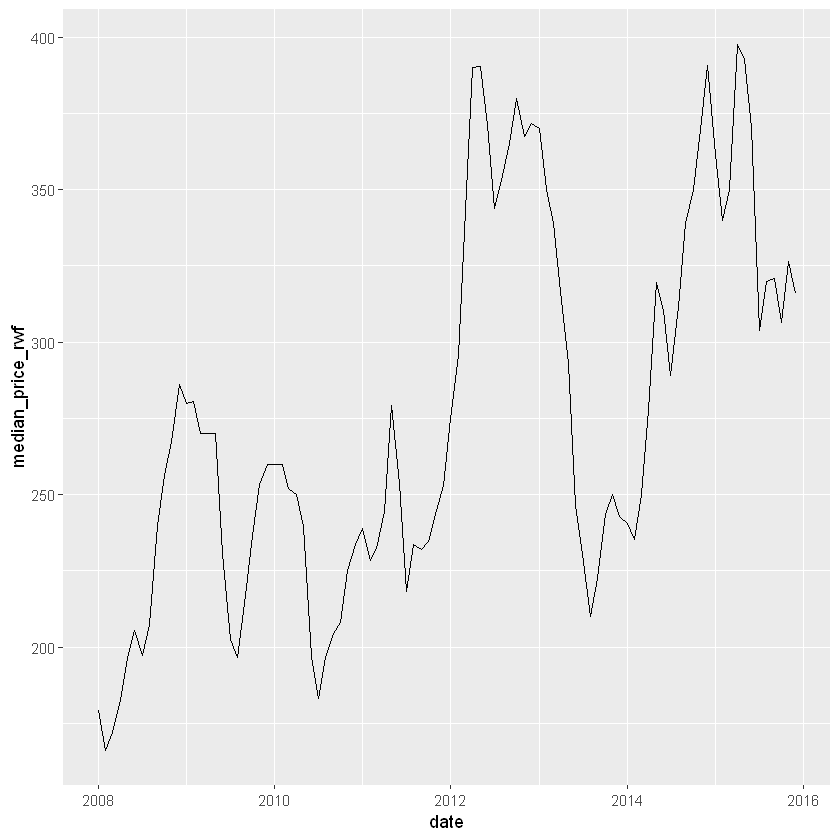

In [58]:
median_price_plot(sorghum_median_price_by_date)

In [67]:
#forcast_price_plot(sorghum_forecast_price)
test_a <- as.data.frame(sorghum_forecast_price)%>%rownames_to_column(var='date')%>% rename('Forecast'= 'Point Forecast')
typeof(test_a$date)


[1] "character"